# Customer Support on Twitter EDA

## About Data set

The Customer Support on Twitter dataset is a large, modern corpus of tweets and replies to aid innovation in natural language understanding and conversational models, and for study of modern customer support practices and impact.

*This data set contains nearly 2.8 million tweets and replies from the biggest brands on Twitter.*

*Date range: 2008-05-08 to 2017-12-03*

*Duration: 3496 days*

### Content

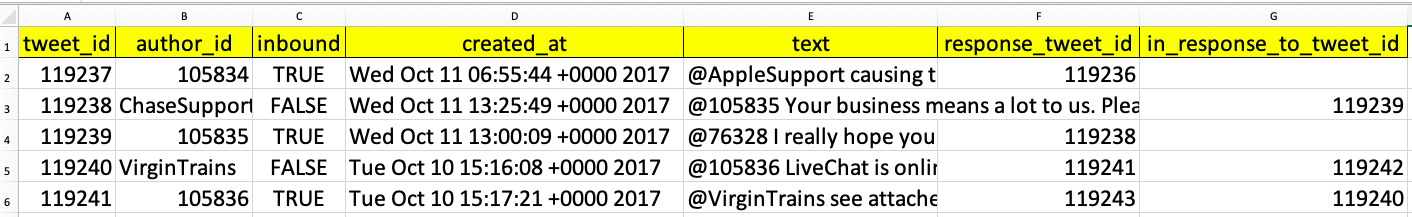

The dataset is a CSV, where each row is a tweet. The different columns are described below. Every conversation included has at least one request from a consumer and at least one response from a company. Which user IDs are company user IDs can be calculated using the inbound field.

***tweet_id***: 
A unique, anonymized ID for the Tweet. Referenced by response_tweet_id and in_response_to_tweet_id.

***author_id***:
A unique, anonymized user ID. @s in the dataset have been replaced with their associated anonymized user ID.

***inbound***:
Whether the tweet is "inbound" to a company doing customer support on Twitter. This feature is useful when re-organizing data for training conversational models.

***created_at***:
Date and time when the tweet was sent.

***text***:
Tweet content. Sensitive information like phone numbers and email addresses are replaced with mask values like email.

***response_tweet_id***:
IDs of tweets that are responses to this tweet, comma-separated.

***in_response_to_tweet_id***:
ID of the tweet this tweet is in response to, if any.

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Installing libaries

In [ ]:
!pip install pandas
!pip install wordcloud
!pip install nltk
!pip install plotly
!pip install emoji
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('vader_lexicon')

### Importing the data set

In [12]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Chat_Analysis/Preprocessing_and_EDA/twcs.csv', low_memory=True, usecols=[*range(0,7)]) #google colab
# df = pd.read_csv('twcs.csv', low_memory=True, usecols=[*range(0,7)])
df.head()

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id
0,1,sprintcare,False,Tue Oct 31 22:10:47 +0000 2017,@115712 I understand. I would like to assist y...,2,3.0
1,2,115712,True,Tue Oct 31 22:11:45 +0000 2017,@sprintcare and how do you propose we do that,NaN,1.0
2,3,115712,True,Tue Oct 31 22:08:27 +0000 2017,@sprintcare I have sent several private messag...,1,4.0
3,4,sprintcare,False,Tue Oct 31 21:54:49 +0000 2017,@115712 Please send us a Private Message so th...,3,5.0
4,5,115712,True,Tue Oct 31 21:49:35 +0000 2017,@sprintcare I did.,4,6.0


In [13]:
# import pandas as pd
# df = pd.read_csv('/content/drive/MyDrive/Chat_Analysis/Preprocessing_and_EDA/sample.csv', low_memory=True, usecols=[*range(0,7)])
# df.head()

### Get Informations of Data Frame

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2811774 entries, 0 to 2811773
Data columns (total 7 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   tweet_id                 int64  
 1   author_id                object 
 2   inbound                  bool   
 3   created_at               object 
 4   text                     object 
 5   response_tweet_id        object 
 6   in_response_to_tweet_id  float64
dtypes: bool(1), float64(1), int64(1), object(4)
memory usage: 131.4+ MB


### Size of Data Set

In [15]:
print('Number of Rows = ',df.shape[0])

Number of Rows =  2811774


### Finding Null Values Before Preprocessing

In [16]:
df.isna().sum()

tweet_id                         0
author_id                        0
inbound                          0
created_at                       0
text                             0
response_tweet_id          1040629
in_response_to_tweet_id     794335
dtype: int64

### Drop Unwanted Columns

In [17]:
df.drop(['inbound','in_response_to_tweet_id'], axis = 1, inplace = True) 
df.columns = ['Tweet_ID', 'Author_ID', 'DateTime', 'Messege', 'Response_ID']
df.head()

,Tweet_ID,Author_ID,DateTime,Messege,Response_ID
0,1,sprintcare,Tue Oct 31 22:10:47 +0000 2017,@115712 I understand. I would like to assist y...,2
1,2,115712,Tue Oct 31 22:11:45 +0000 2017,@sprintcare and how do you propose we do that,NaN
2,3,115712,Tue Oct 31 22:08:27 +0000 2017,@sprintcare I have sent several private messag...,1
3,4,sprintcare,Tue Oct 31 21:54:49 +0000 2017,@115712 Please send us a Private Message so th...,3
4,5,115712,Tue Oct 31 21:49:35 +0000 2017,@sprintcare I did.,4


### Seperating Time column as a Date, Time and DayName columns

In [18]:
df['DateTime']=pd.to_datetime(df['DateTime']) # Converting to standard format date and time

df['Date'] = df['DateTime'].dt.date
df['Time'] = df['DateTime'].dt.time
df['DayName'] = df['DateTime'].dt.day_name()

df.drop('DateTime', axis = 1, inplace = True)

df = df[['Tweet_ID','Date','Time','DayName','Author_ID','Messege','Response_ID']]

df.head()

,Tweet_ID,Date,Time,DayName,Author_ID,Messege,Response_ID
0,1,2017-10-31,22:10:47,Tuesday,sprintcare,@115712 I understand. I would like to assist y...,2
1,2,2017-10-31,22:11:45,Tuesday,115712,@sprintcare and how do you propose we do that,NaN
2,3,2017-10-31,22:08:27,Tuesday,115712,@sprintcare I have sent several private messag...,1
3,4,2017-10-31,21:54:49,Tuesday,sprintcare,@115712 Please send us a Private Message so th...,3
4,5,2017-10-31,21:49:35,Tuesday,115712,@sprintcare I did.,4


### Sorting data set by Date and Time

In [19]:
df.sort_values(by = ['Date','Time'], inplace = True)
df.head(10)

,Tweet_ID,Date,Time,DayName,Author_ID,Messege,Response_ID
706552,790341,2008-05-08,20:13:59,Thursday,SouthwestAir,@34622 Have FUN at the lecture tonight! Tell...,790326
706551,790326,2008-05-08,21:04:16,Thursday,308466,@SouthwestAir Can you pls enter the HI market ...,"790327,790328,790325,790329,790330,790331,7903..."
1604529,1757947,2010-02-16,15:49:47,Tuesday,529256,KTAR.com - Foreclosures still big problem in V...,1757946
2129896,2291020,2010-03-31,15:24:29,Wednesday,665443,@665445 Do you know if Carl's Jr serves lunch ...,2291018
2129894,2291018,2010-03-31,16:53:27,Wednesday,CarlsJr,@665443 We serve lunch all day!,2291019
2482179,2651976,2010-07-05,02:00:34,Monday,747941,I really need @VirginAmerica or @JetBlue to ha...,2651975
2482178,2651975,2010-07-05,02:39:13,Monday,JetBlue,@747941 Check our best deals at http://bit.ly/...,2651974
314016,359955,2010-08-30,17:17:10,Monday,AskPlayStation,Welcome to @AskPlayStation. We're here to prov...,"359956,359957,359958,359959,359960,359961,3599..."
1829652,1985354,2010-09-07,00:29:54,Tuesday,117890,#Austin area customers... Services seem to be ...,1985353
2003766,2161031,2011-03-13,17:22:14,Sunday,166178,Email id of TRAI Public Grievance Cell 4any #M...,2161030


### Date range of Data set

In [20]:
start = df['Date'].min()
end = df['Date'].max()

print('Starting date = ', start)
print('Ending date = ', end)
print('Time duration = ', (end - start))

Starting date =  2008-05-08
Ending date =  2017-12-03
Time duration =  3496 days, 0:00:00


# Preprocessing Messege

### Separate Text into Message and Receiver

In [21]:
def RemoveName(text):
  msg = []
  receiver = []

  for i in text:
    word = ''
    receiver_temp = []
    i = i.strip()
    splitted_list = i.split(' ')

    for j in splitted_list:
      if j == '' or j == "" or j == ' ' or j == " ":
        continue
      elif j[0] == '@':
        if len(j) == 1:
          word = word + ' ' + j
        else:
          receiver_temp.append(j[1:])
      else :
        word = word + ' ' + j.lower()
    
    msg.append(word.strip())
      
    if len(receiver_temp) == 0:
      receiver.append(None)
    else:
      receiver.append(','.join(receiver_temp))

  return msg,receiver

In [22]:
Messege_list = df['Messege'].tolist()
Messege, Receiver_ID = RemoveName(Messege_list)
df.drop('Messege', axis = 1, inplace = True)
df.insert(5, 'Receiver_ID', '')
df.insert(6, 'Messege', '')
df['Messege'] = Messege
df['Receiver_ID'] = Receiver_ID
df.head(10)

,Tweet_ID,Date,Time,DayName,Author_ID,Receiver_ID,Messege,Response_ID
706552,790341,2008-05-08,20:13:59,Thursday,SouthwestAir,34622,have fun at the lecture tonight! tell paula (t...,790326
706551,790326,2008-05-08,21:04:16,Thursday,308466,SouthwestAir,can you pls enter the hi market (interisland &...,"790327,790328,790325,790329,790330,790331,7903..."
1604529,1757947,2010-02-16,15:49:47,Tuesday,529256,41702,ktar.com - foreclosures still big problem in v...,1757946
2129896,2291020,2010-03-31,15:24:29,Wednesday,665443,665445,do you know if carl's jr serves lunch all day?...,2291018
2129894,2291018,2010-03-31,16:53:27,Wednesday,CarlsJr,665443,we serve lunch all day!,2291019
2482179,2651976,2010-07-05,02:00:34,Monday,747941,"VirginAmerica,JetBlue",i really need or to have a sale so i can book ...,2651975
2482178,2651975,2010-07-05,02:39:13,Monday,JetBlue,747941,check our best deals at http://bit.ly/jbdeals\...,2651974
314016,359955,2010-08-30,17:17:10,Monday,AskPlayStation,"AskPlayStation.,117014",welcome to we're here to provide useful suppor...,"359956,359957,359958,359959,359960,359961,3599..."
1829652,1985354,2010-09-07,00:29:54,Tuesday,117890,None,#austin area customers... services seem to be ...,1985353
2003766,2161031,2011-03-13,17:22:14,Sunday,166178,None,email id of trai public grievance cell 4any #m...,2161030


### Finding Null Values After Adding Receiver_ID Column

Tweet_ID             0
Date                 0
Time                 0
DayName              0
Author_ID            0
Receiver_ID      70139
Messege              0
Response_ID    1040629
dtype: int64


Text(0.5, 1.0, 'Null Value Graph')

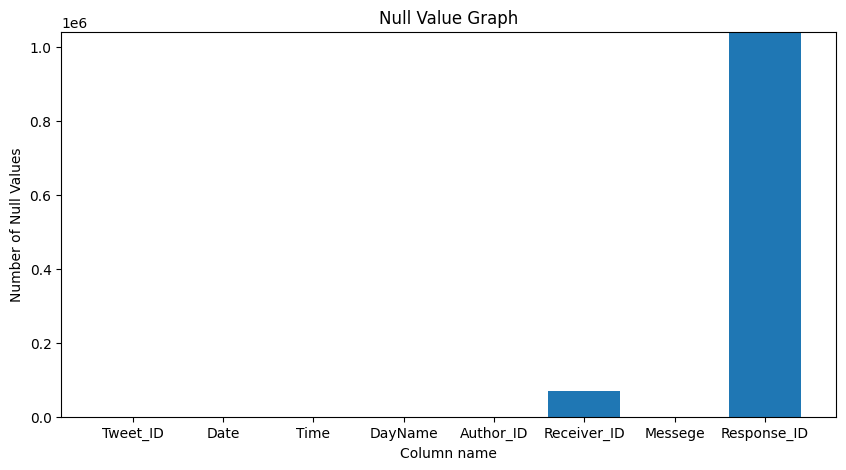

In [23]:
import matplotlib.pyplot as plt

data = df.isna().sum()
print(data)
NullValues = data.tolist()
columns = data.index.tolist()

plt.figure(figsize = (10,5))
plt.ylim(0,max(NullValues)+1)
plt.bar(columns,NullValues)
plt.xlabel('Column name')
plt.ylabel('Number of Null Values')
plt.title("Null Value Graph")

### Original Chat Set

In [24]:
df['Messege'].tolist()[0:10]

['have fun at the lecture tonight! tell paula (the speaker) we say hello!',
 'can you pls enter the hi market (interisland & transpacific)? :) we are hurting for good fares! mahalo!',
 'ktar.com - foreclosures still big problem in valley: http://www.ktar.com/?nid=6&sid=1263891 via',
 "do you know if carl's jr serves lunch all day? or after 1030?",
 'we serve lunch all day!',
 'i really need or to have a sale so i can book my airfare to la. hint, hint :)',
 'check our best deals at http://bit.ly/jbdeals\nand sign up for fare alerts: http://bit.ly/jbfarealerts',
 "welcome to we're here to provide useful support to maximize your capabilities & experiences. follow us!",
 '#austin area customers... services seem to be slowly returning. techs still working to restore service. ^ps',
 'email id of trai public grievance cell 4any #mnp complaint __email__ __email__ __email__ #india http://bit.ly/dejk7k']

### Romove Web Links

In [25]:
df['Messege'] = df['Messege'].str.replace('http\S+|www.\S+',' ', case=False, regex=True)
# regex - Regular Expression (replacing elements within strings of text)
print(df['Messege'].tolist()[0:10])

['have fun at the lecture tonight! tell paula (the speaker) we say hello!', 'can you pls enter the hi market (interisland & transpacific)? :) we are hurting for good fares! mahalo!', 'ktar.com - foreclosures still big problem in valley:   via', "do you know if carl's jr serves lunch all day? or after 1030?", 'we serve lunch all day!', 'i really need or to have a sale so i can book my airfare to la. hint, hint :)', 'check our best deals at  \nand sign up for fare alerts:  ', "welcome to we're here to provide useful support to maximize your capabilities & experiences. follow us!", '#austin area customers... services seem to be slowly returning. techs still working to restore service. ^ps', 'email id of trai public grievance cell 4any #mnp complaint __email__ __email__ __email__ #india  ']


In [26]:
data = df # For performing sentiment analysis

### Remove Punctuation Characters

In [27]:
import string

# string.punctuation - !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~

df['Messege'] = df['Messege'].str.replace('[{}]'.format(string.punctuation),'',case=True, regex=True)

df['Messege'].tolist()[0:10]

['have fun at the lecture tonight tell paula the speaker we say hello',
 'can you pls enter the hi market interisland  transpacific  we are hurting for good fares mahalo',
 'ktarcom  foreclosures still big problem in valley   via',
 'do you know if carls jr serves lunch all day or after 1030',
 'we serve lunch all day',
 'i really need or to have a sale so i can book my airfare to la hint hint ',
 'check our best deals at  \nand sign up for fare alerts  ',
 'welcome to were here to provide useful support to maximize your capabilities  experiences follow us',
 'austin area customers services seem to be slowly returning techs still working to restore service ps',
 'email id of trai public grievance cell 4any mnp complaint email email email india  ']

### Remove Numbers

In [28]:
df['Messege'] = df['Messege'].str.replace('\d+', '',regex=True)
df['Messege'].tolist()[0:10]

['have fun at the lecture tonight tell paula the speaker we say hello',
 'can you pls enter the hi market interisland  transpacific  we are hurting for good fares mahalo',
 'ktarcom  foreclosures still big problem in valley   via',
 'do you know if carls jr serves lunch all day or after ',
 'we serve lunch all day',
 'i really need or to have a sale so i can book my airfare to la hint hint ',
 'check our best deals at  \nand sign up for fare alerts  ',
 'welcome to were here to provide useful support to maximize your capabilities  experiences follow us',
 'austin area customers services seem to be slowly returning techs still working to restore service ps',
 'email id of trai public grievance cell any mnp complaint email email email india  ']

### Change Emojies withe Text

In [29]:
import emoji
df['Messege'] = df['Messege'].apply(lambda x: emoji.demojize(x,delimiters=("","")))
df['Messege'] = df['Messege'].str.replace('_',' ',regex=True).replace('-',' ',regex=True)
df['Messege'].tolist()[0:10]

['have fun at the lecture tonight tell paula the speaker we say hello',
 'can you pls enter the hi market interisland  transpacific  we are hurting for good fares mahalo',
 'ktarcom  foreclosures still big problem in valley   via',
 'do you know if carls jr serves lunch all day or after ',
 'we serve lunch all day',
 'i really need or to have a sale so i can book my airfare to la hint hint ',
 'check our best deals at  \nand sign up for fare alerts  ',
 'welcome to were here to provide useful support to maximize your capabilities  experiences follow us',
 'austin area customers services seem to be slowly returning techs still working to restore service ps',
 'email id of trai public grievance cell any mnp complaint email email email india  ']

### Word Cloud (Before Removing Stop Words)

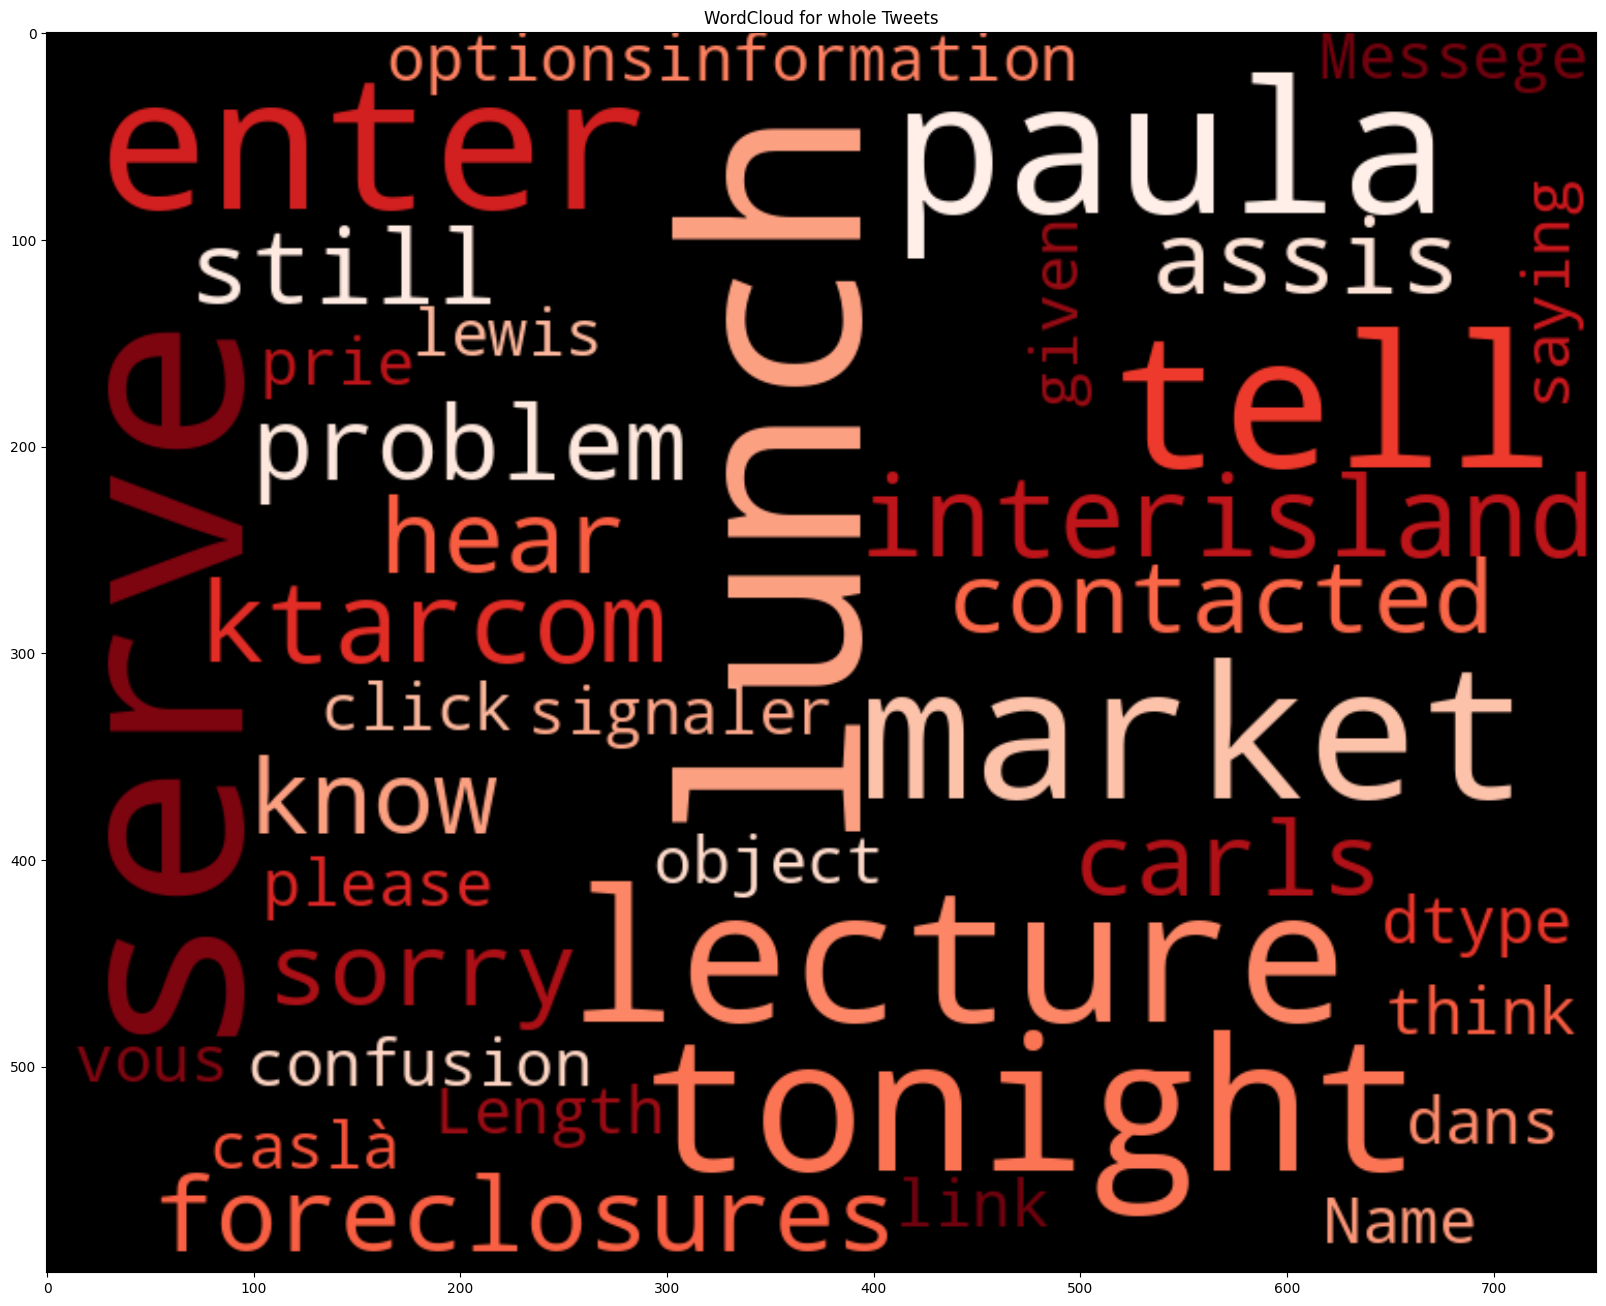

In [30]:
from wordcloud import WordCloud

Msg = str(df['Messege'])
text = WordCloud(width = 750,
                       height = 600,
                       colormap = 'Reds', 
                       margin = 0,
                       max_words = 500,  
                       min_word_length = 4,
                       max_font_size = 120, min_font_size = 15,  
                       background_color = "black").generate(Msg)
plt.figure(figsize=(20,20))
plt.imshow(text,interpolation='bilinear')
plt.title('WordCloud for whole Tweets')
plt.show()

### Remove Stop Words

In [31]:
import nltk
from nltk.corpus import stopwords

stopWord = stopwords.words('english')
stop = []
for i in stopWord:
    stop.append(i.replace("'", ''))
new_stopWords = ['thats','im','min','mm','hmm','wed','us','h','hour','hours','theyre','amp','pm','let','mtr','m','cm','km','meter','metre','theres','dm',
                 'ay','rr','ive','ill','please','pls','hello','p','h','de','paula','miriam','still','previously','via','hi','e','xlviii','wasn',
                 'thpcpwgkxgwwmwycjvz','theyll','xxslezsakxx','cant','weve','mike','julie','david','mine','fci5qn','kshs','cqce3nyk0','fpfmpl8kxa','thoreau',
                 'bduigglpzi','ekoaiajuah','xluajb8pdg','udageldhhc','mehuyrgvzq','h3etfz2crq','me1cvnby95','qkic9dagu7','tw77j10k99']
stop.extend(new_stopWords)

In [32]:
df['Messege'] = df['Messege'].apply(lambda x: ' '.join([item for item in x.split() if item not in stop]))
df['Messege'].tolist()[0:10]

['fun lecture tonight tell speaker say',
 'enter market interisland transpacific hurting good fares mahalo',
 'ktarcom foreclosures big problem valley',
 'know carls jr serves lunch day',
 'serve lunch day',
 'really need sale book airfare la hint hint',
 'check best deals sign fare alerts',
 'welcome provide useful support maximize capabilities experiences follow',
 'austin area customers services seem slowly returning techs working restore service ps',
 'email id trai public grievance cell mnp complaint email email email india']

### Tokenization and Lemmatization


In [33]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

df['Messege'] = df['Messege'].apply(lambda x: nltk.word_tokenize(x)) # Tokenizing

lem = WordNetLemmatizer()
df['Messege'] = df['Messege'].apply(lambda x: ' '.join([lem.lemmatize(word, pos='v') for word in x])) #pos - part-of-speech,  v - 
df['Messege'].tolist()[0:10]

['fun lecture tonight tell speaker say',
 'enter market interisland transpacific hurt good fare mahalo',
 'ktarcom foreclosures big problem valley',
 'know carls jr serve lunch day',
 'serve lunch day',
 'really need sale book airfare la hint hint',
 'check best deal sign fare alert',
 'welcome provide useful support maximize capabilities experience follow',
 'austin area customers service seem slowly return techs work restore service ps',
 'email id trai public grievance cell mnp complaint email email email india']

### Word Clouds (After Removing Stop Words) for 2014 year week wise

In [34]:
df['Date']=pd.to_datetime(df['Date'])
substract_df = df.loc[df["Date"].between("2014-01-01", "2014-12-31")]

date = substract_df['Date']
new_df = pd.DataFrame({'Date': date, 'week_num':date.dt.week, 'Messege':substract_df['Messege']})
new_df.head()

<ipython-input-34-b0871212757f>:5: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  new_df = pd.DataFrame({'Date': date, 'week_num':date.dt.week, 'Messege':substract_df['Messege']})


,Date,week_num,Messege
2110078,2014-01-09,2,chala bagundali antha
1099683,2014-01-12,2,nfl playoffs might want start think nfl nynj t...
1110858,2014-01-15,3,breakfast
1110855,2014-01-15,3,hope enjoy
2349598,2014-01-29,5,make complaint yesterday tell would get email ...


In [35]:
weeklist = new_df['week_num'].value_counts().index

for weekNum in weeklist:
  msg = new_df.loc[new_df['week_num'] == weekNum]['Messege'].tolist()
  words_for_week = ' '.join(msg)
  text = WordCloud(width = 750, height = 600, colormap = 'Reds', margin = 0,
                   max_words = 500, min_word_length = 4, max_font_size = 120,
                   min_font_size = 15, background_color = "black").generate(words_for_week)
  plt.figure(figsize=(10,10))
  plt.title(f'year-2014 :- week No. {weekNum}')
  plt.axis('off')
  plt.imshow(text,interpolation='bilinear')
  plt.show()

Output hidden; open in https://colab.research.google.com to view.

### Final Output of Data set

In [36]:
df.head(10)

,Tweet_ID,Date,Time,DayName,Author_ID,Receiver_ID,Messege,Response_ID
706552,790341,2008-05-08,20:13:59,Thursday,SouthwestAir,34622,fun lecture tonight tell speaker say,790326
706551,790326,2008-05-08,21:04:16,Thursday,308466,SouthwestAir,enter market interisland transpacific hurt goo...,"790327,790328,790325,790329,790330,790331,7903..."
1604529,1757947,2010-02-16,15:49:47,Tuesday,529256,41702,ktarcom foreclosures big problem valley,1757946
2129896,2291020,2010-03-31,15:24:29,Wednesday,665443,665445,know carls jr serve lunch day,2291018
2129894,2291018,2010-03-31,16:53:27,Wednesday,CarlsJr,665443,serve lunch day,2291019
2482179,2651976,2010-07-05,02:00:34,Monday,747941,"VirginAmerica,JetBlue",really need sale book airfare la hint hint,2651975
2482178,2651975,2010-07-05,02:39:13,Monday,JetBlue,747941,check best deal sign fare alert,2651974
314016,359955,2010-08-30,17:17:10,Monday,AskPlayStation,"AskPlayStation.,117014",welcome provide useful support maximize capabi...,"359956,359957,359958,359959,359960,359961,3599..."
1829652,1985354,2010-09-07,00:29:54,Tuesday,117890,None,austin area customers service seem slowly retu...,1985353
2003766,2161031,2011-03-13,17:22:14,Sunday,166178,None,email id trai public grievance cell mnp compla...,2161030


# Perform EDA

### Finding Who Sent Most Messages

In [37]:
from plotly.offline import  init_notebook_mode, iplot, plot
import plotly.graph_objs as go
import plotly.express as px

dta = df['Author_ID'].value_counts()
authors = dta.index.tolist()
counts = dta.tolist()

authors_msg_counts = pd.DataFrame(list(zip(authors, counts)), columns=['Author_ID','Number of messages sent'])

x = authors_msg_counts['Author_ID'].tolist()[0:10]
y = authors_msg_counts['Number of messages sent'].tolist()[0:10]
trace1 =go.Bar(
            x = x,
            y = y,
            marker = dict(color = 'rgba(255,10,20,30.5)', line=dict(color='rgb(0,100,200)',width=1.5)),
            text=y)
data1 = [trace1]
layout = go.Layout(barmode="group")
fig = go.Figure(data = data1,layout=layout)
iplot(fig)

### Finding Who Rceived Most Messages

In [38]:
dta = df['Receiver_ID'].value_counts()
receivers = dta.index.tolist()
counts = dta.tolist()

receivers_msg_count = pd.DataFrame(list(zip(receivers, counts)), columns=['Receiver_ID','Number of messages Received'])

x = receivers_msg_count['Receiver_ID'].tolist()[0:10]
y = receivers_msg_count['Number of messages Received'].tolist()[0:10]
trace1 =go.Bar(
            x = x,
            y = y,
            marker = dict(color = 'rgba(255,120,250,190.5)',
                          line=dict(color='rgb(50,150,200)',width=1.5)),
            text=y)
data1 = [trace1]
layout = go.Layout(barmode="group")
fig = go.Figure(data = data1,layout=layout)
iplot(fig)

### Most Active Dates

In [39]:
dta = df['Date'].value_counts()
date = dta.index.tolist()
counts = dta.tolist()

most_active_dates = pd.DataFrame(list(zip(date, counts)), columns=['Date','Frequency'])
most_active_dates.head(10)

,Date,Frequency
0,2017-11-07,62793
1,2017-10-27,59136
2,2017-11-08,58169
3,2017-11-06,57981
4,2017-11-03,57233
5,2017-12-01,53857
6,2017-11-14,53731
7,2017-11-29,53610
8,2017-11-28,53538
9,2017-11-30,53476


### Most Active Days

     DayName  Frequency
0     Friday     453028
1  Wednesday     445838
2   Thursday     440361
3    Tuesday     423052
4     Monday     387847
5   Saturday     332606
6     Sunday     329042


Text(0.5, 1.0, 'Most Active Days')

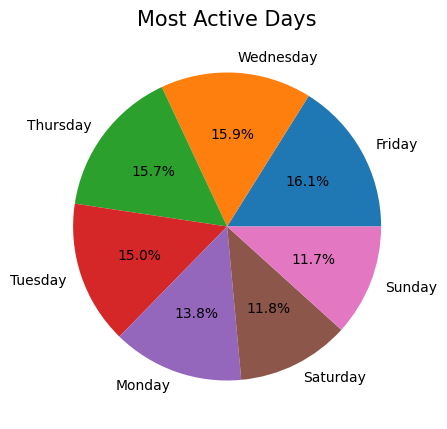

In [40]:
dta = df['DayName'].value_counts()
day = dta.index
counts = dta.tolist()

most_active_days = pd.DataFrame(list(zip(day, counts)), columns=['DayName','Frequency'])
print(most_active_days.head(10))

plt.figure(figsize =(5,5))
plt.pie(counts, labels=day,autopct='%1.1f%%')
plt.title("Most Active Days", color='black', fontsize = 15)

### Find Mostly used 10 Words by each Author

In [41]:
authors = df['Author_ID'].value_counts().index # Taking Authors name list

authors = authors[0:1000]

words = []
for i in authors:
    a = df.loc[df['Author_ID'] == i]['Messege'].str.split(expand=True).stack().value_counts() #ascending order according to count
    word = a.index # All the words used by an author

    if len(word) > 10: 
      word = ', '.join(word[0:10])
    else:
      word = ', '.join(word)
    words.append(word)

most_used_words = pd.DataFrame(list(zip(authors, words)), columns=['Author_ID','Frequently used Words'])
most_used_words.head(10)

,Author_ID,Frequently used Words
0,AmazonHelp,"sorry, order, detail, provide, look, help, lik..."
1,AppleSupport,"help, issue, ’, look, ios, well, know, let, ge..."
2,Uber_Support,"send, help, team, email, note, follow, connect..."
3,SpotifyCares,"hey, well, help, email, account, address, look..."
4,Delta,"thank, sorry, confirmation, number, flight, he..."
5,Tesco,"sorry, store, thank, address, name, ty, full, ..."
6,AmericanAir,"well, sorry, team, flight, take, look, locator..."
7,TMobileHelp,"send, get, want, help, let, hey, look, well, t..."
8,comcastcares,"account, address, number, send, phone, help, l..."
9,British_Airways,"sorry, flight, book, hear, number, well, thank..."


# Performe Sentiment Analysis

#### Extracting Sample Data Tweets Between 2014-01-01 to 2014-12-31 to Manually Add Positive, Negetive And Nutral Tag

In [42]:
# data['Date']=pd.to_datetime(data['Date'])
# out_df = data.loc[data["Date"].between("2014-01-01", "2014-12-31")][0:275]
# out_df.to_csv('/content/drive/MyDrive/Chat_Analysis/Preprocessing_and_EDA/sentiment_pre.csv')

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2811774 entries, 706552 to 524147
Data columns (total 8 columns):
 #   Column       Dtype         
---  ------       -----         
 0   Tweet_ID     int64         
 1   Date         datetime64[ns]
 2   Time         object        
 3   DayName      object        
 4   Author_ID    object        
 5   Receiver_ID  object        
 6   Messege      object        
 7   Response_ID  object        
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 193.1+ MB


### Importing Each Member's Manually Added Sentiment Tag Data Sets

In [44]:
Hisham = pd.read_csv('/content/drive/MyDrive/Chat_Analysis/Preprocessing_and_EDA/Hisham_Manual.csv', low_memory=True, usecols=[*range(0,2)])
Pawani = pd.read_csv('/content/drive/MyDrive/Chat_Analysis/Preprocessing_and_EDA/Pawani_Manual.csv', low_memory=True, usecols=[*range(0,2)])
Pasindhu = pd.read_csv('/content/drive/MyDrive/Chat_Analysis/Preprocessing_and_EDA/Pasindu_Manual.csv', low_memory=True, usecols=[*range(0,2)])

# Hisham_Sentiment_df = pd.read_csv('Hisham\'s_Sentiment_Tag.csv', low_memory=True, usecols=[*range(2,4)])
# Pawani_Sentiment_df = pd.read_csv('Pawani\'s_Sentiment_Tag.csv', low_memory=True, usecols=[*range(2,4)])
# Pasindhu_Sentiment_df = pd.read_csv('Pasindhu\'s_Sentiment_Tag.csv', low_memory=True, usecols=[*range(2,4)])

Hisham.head()

,Messege,Manual Sentiment
0,chala bagundali antha,Neutral
1,nfl #playoffs! might want to start thinking ab...,Neutral
2,breakfast,Neutral
3,hope you enjoyed it!,Positive
4,"hi, i made a complaint yesterday and was told ...",Negative


#### Adding Sentiment Tags for Different Ranges for Each Members Data Sets using NLTK Library

In [45]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

Hisham_NLTK = pd.DataFrame(analyzer.polarity_scores(item) for item in Hisham['Messege'].tolist())
Pawani_NLTK = pd.DataFrame(analyzer.polarity_scores(item) for item in Pawani['Messege'].tolist())
Pasindhu_NLTK = pd.DataFrame(analyzer.polarity_scores(item) for item in Pasindhu['Messege'].tolist())

In [46]:
def AddNltkSentiment(ub,lb,df):
  NLTK_Tag = []
  for com in df['compound']:
    if com > ub:
      NLTK_Tag.append('Positive')
    elif com < -lb:
      NLTK_Tag.append('Negative')
    else:
      NLTK_Tag.append('Neutral')
  return NLTK_Tag

In [47]:
ub = [0,0.25,0.25,0.3,0.3,0.35,0.4,0.5]
lb = [0,0.2,0.25,0.2,0.25,0.25,0.25,0.5]
for i in range(0,8):
  Pasindhu[f'NLTK Range ((-{lb[i]})-({ub[i]}))'] = AddNltkSentiment(ub[i],lb[i],Pasindhu_NLTK)
  Hisham[f'NLTK Range ((-{lb[i]})-({ub[i]}))'] = AddNltkSentiment(ub[i],lb[i],Hisham_NLTK)
  Pawani[f'NLTK Range ((-{lb[i]})-({ub[i]}))'] = AddNltkSentiment(ub[i],lb[i],Pawani_NLTK)

Hisham.head(10)

,Messege,Manual Sentiment,NLTK Range ((-0)-(0)),NLTK Range ((-0.2)-(0.25)),NLTK Range ((-0.25)-(0.25)),NLTK Range ((-0.2)-(0.3)),NLTK Range ((-0.25)-(0.3)),NLTK Range ((-0.25)-(0.35)),NLTK Range ((-0.25)-(0.4)),NLTK Range ((-0.5)-(0.5))
0,chala bagundali antha,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral
1,nfl #playoffs! might want to start thinking ab...,Neutral,Positive,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral
2,breakfast,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral
3,hope you enjoyed it!,Positive,Positive,Positive,Positive,Positive,Positive,Positive,Positive,Positive
4,"hi, i made a complaint yesterday and was told ...",Negative,Negative,Negative,Negative,Negative,Negative,Negative,Negative,Neutral
5,"yes i did, they told me if get an email resolu...",Neutral,Positive,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral
6,have you checked your spam folders yet? ^jn,Negative,Negative,Negative,Negative,Negative,Negative,Negative,Negative,Neutral
7,i carnt down load software too my new game it ...,Negative,Positive,Positive,Positive,Positive,Positive,Neutral,Neutral,Neutral
8,well let's take a look at that together! are w...,Positive,Positive,Positive,Positive,Positive,Positive,Positive,Positive,Neutral
9,xbox 360 it was all fine untill i put lma mang...,Neutral,Positive,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral


### Find Accuracy of NLTK Library for Each Member Data Set By Using Confuision Matrix/Precision/Recall and F1-Score Tests for Different Ranges.

In [48]:
def ConfusionMatrixAndPrecisionRecallF1(ub,lb,df,Name):
  manual_tag = df['Manual Sentiment'].map({'Positive':'pos', 'Neutral':'neu', 'Negative':'neg'})
  nltk_tag = df[f'NLTK Range ((-{lb})-({ub}))'].map({'Positive':'pos', 'Neutral':'neu', 'Negative':'neg'})

  print(f'############################ {Name} ############################')
  print('')
  print('--------------- Confusion Matrix ---------------')
  conf_mat = pd.crosstab(manual_tag, nltk_tag)
  print(conf_mat)
  print('')
  print('--------------- Precision/Recall/F1 Score ---------------')
  print(classification_report(manual_tag,nltk_tag))

In [49]:
def FindAccuracy(ub,lb,df,Name):
  manual = df['Manual Sentiment'].tolist()
  nltk = df[f'NLTK Range ((-{lb})-({ub}))'].tolist()

  similar = []
  for j in range(0,len(manual)):
    if manual[j].lower() == nltk[j].lower():
      similar.append(1)
    else:
      similar.append(0)

  accuracy = (sum(similar)/len(similar))*100
  print(f"Accuracy of NLTK library Range ((-{lb})-({ub})): {round(accuracy,2)}%")
  print('')
  print('')

In [50]:
from sklearn.metrics import classification_report

for i in range(0,8):
  print(f'______________________________ Range - ((-{lb[i]})-({ub[i]}))______________________________')
  print('')
  ConfusionMatrixAndPrecisionRecallF1(ub[i],lb[i],Hisham,"Hisham")
  FindAccuracy(ub[i],lb[i],Hisham,"Hisham")
  ConfusionMatrixAndPrecisionRecallF1(ub[i],lb[i],Pawani,"Pawani")
  FindAccuracy(ub[i],lb[i],Pawani,"Pawani")
  ConfusionMatrixAndPrecisionRecallF1(ub[i],lb[i],Pasindhu,"Pasindhu")
  FindAccuracy(ub[i],lb[i],Pasindhu,"Pasindhu")

______________________________ Range - ((-0)-(0))______________________________

############################ Hisham ############################

--------------- Confusion Matrix ---------------
NLTK Range ((-0)-(0))  neg  neu  pos
Manual Sentiment                    
neg                     45    2    4
neu                     15   44   37
pos                      0    1   51

--------------- Precision/Recall/F1 Score ---------------
              precision    recall  f1-score   support

         neg       0.75      0.88      0.81        51
         neu       0.94      0.46      0.62        96
         pos       0.55      0.98      0.71        52

    accuracy                           0.70       199
   macro avg       0.75      0.77      0.71       199
weighted avg       0.79      0.70      0.69       199

Accuracy of NLTK library Range ((-0)-(0)): 70.35%


############################ Pawani ############################

--------------- Confusion Matrix ---------------
NLTK Range (

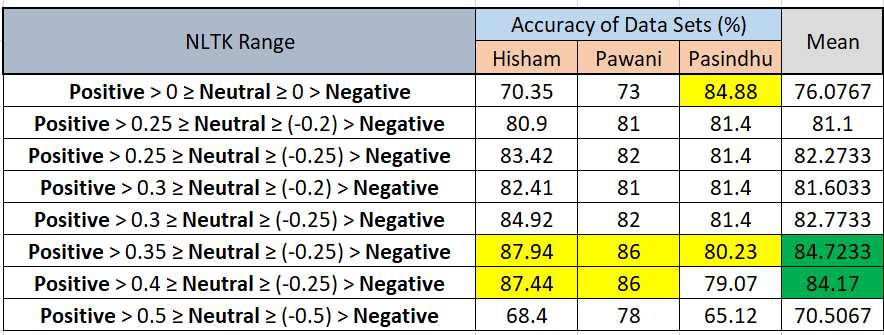

### Merging 3 Data Sets Into 1 Data Set

In [51]:
Merged_df = pd.concat([Hisham, Pawani, Pasindhu], axis = 0)
Merged_df.head()

,Messege,Manual Sentiment,NLTK Range ((-0)-(0)),NLTK Range ((-0.2)-(0.25)),NLTK Range ((-0.25)-(0.25)),NLTK Range ((-0.2)-(0.3)),NLTK Range ((-0.25)-(0.3)),NLTK Range ((-0.25)-(0.35)),NLTK Range ((-0.25)-(0.4)),NLTK Range ((-0.5)-(0.5))
0,chala bagundali antha,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral
1,nfl #playoffs! might want to start thinking ab...,Neutral,Positive,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral
2,breakfast,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral
3,hope you enjoyed it!,Positive,Positive,Positive,Positive,Positive,Positive,Positive,Positive,Positive
4,"hi, i made a complaint yesterday and was told ...",Negative,Negative,Negative,Negative,Negative,Negative,Negative,Negative,Neutral


### Find Accuracy of NLTK Library for Merged Data Set By Using Confuision Matrix/Precision/Recall and F1-Score Tests

In [52]:
Merged_NLTK = pd.DataFrame(analyzer.polarity_scores(item) for item in Merged_df['Messege'].tolist())


for i in range(0,8):
  Merged_df[f'NLTK Range ((-{lb[i]})-({ub[i]}))'] = AddNltkSentiment(ub[i],lb[i],Merged_NLTK)


print('______________________________ Range - ((-0.25)-(0.35))______________________________')
print('')
ConfusionMatrixAndPrecisionRecallF1(0.35,0.25,Merged_df,"Merged_df")
FindAccuracy(0.35,0.25,Merged_df,"Merged_df")
print('______________________________ Range - ((-0.25)-(0.4))______________________________')
print('')
ConfusionMatrixAndPrecisionRecallF1(0.4,0.25,Merged_df,"Merged_df")
FindAccuracy(0.4,0.25,Merged_df,"Merged_df")


for i in range(0,8):
  print(f'______________________________ Range - ((-{lb[i]})-({ub[i]}))______________________________')
  print('')
  FindAccuracy(ub[i],lb[i],Merged_df,"Merged_df")

______________________________ Range - ((-0.25)-(0.35))______________________________

############################ Merged_df ############################

--------------- Confusion Matrix ---------------
NLTK Range ((-0.25)-(0.35))  neg  neu  pos
Manual Sentiment                          
neg                           68   10    5
neu                            6  163   17
pos                            0   17   99

--------------- Precision/Recall/F1 Score ---------------
              precision    recall  f1-score   support

         neg       0.92      0.82      0.87        83
         neu       0.86      0.88      0.87       186
         pos       0.82      0.85      0.84       116

    accuracy                           0.86       385
   macro avg       0.86      0.85      0.86       385
weighted avg       0.86      0.86      0.86       385

Accuracy of NLTK library Range ((-0.25)-(0.35)): 85.71%


______________________________ Range - ((-0.25)-(0.4))____________________________

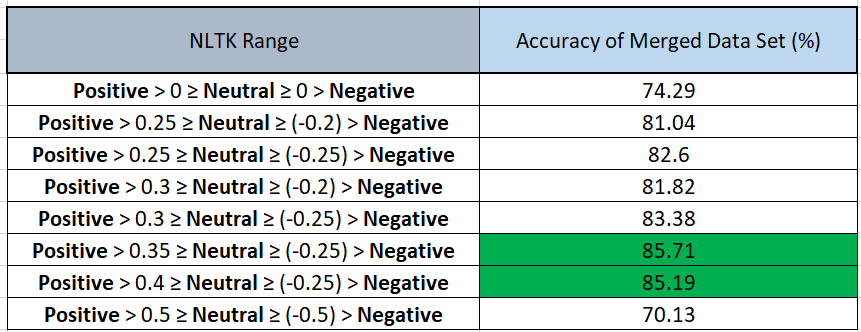

#### Creating Confusion Matrix for Merged Data Set for \Range (-0.25) - 0.35 (Best Range)

In [53]:
manual_tag = Merged_df['Manual Sentiment'].map({'Positive':'pos', 'Neutral':'neu', 'Negative':'neg'})
nltk_tag = Merged_df['NLTK Range ((-0.25)-(0.35))'].map({'Positive':'pos', 'Neutral':'neu', 'Negative':'neg'})

conf_mat = pd.crosstab(manual_tag, nltk_tag)
print(conf_mat)

NLTK Range ((-0.25)-(0.35))  neg  neu  pos
Manual Sentiment                          
neg                           68   10    5
neu                            6  163   17
pos                            0   17   99


<Axes: xlabel='NLTK Range ((-0.25)-(0.35))', ylabel='Manual Sentiment'>

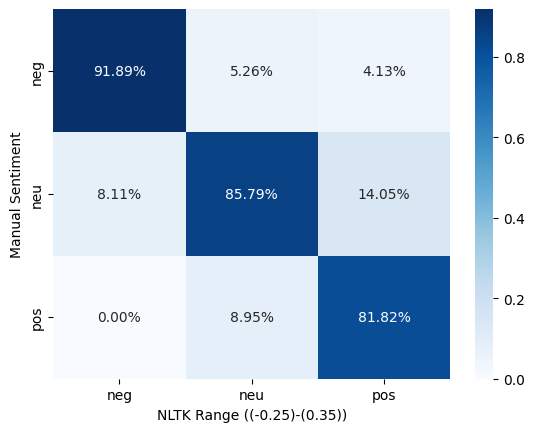

In [54]:
import seaborn as sns
import numpy as np

sns.heatmap(conf_mat/np.sum(conf_mat), annot=True, fmt='.2%', cmap='Blues')

### Let's Find Accuracy for Test Data Set for range (-0.25) to 0.35 (Best Range)

In [55]:
Test = pd.read_csv('/content/drive/MyDrive/Chat_Analysis/Preprocessing_and_EDA/Test.csv', low_memory=True, usecols=[*range(0,2)])
Test.head()

,Messege,Manual Sentiment
0,chala bagundali antha,Neutral
1,breakfast,Neutral
2,"hi, i made a complaint yesterday and was told ...",Negative
3,have you checked your spam folders yet? ^jn,Negative
4,well let's take a look at that together! are w...,Positive


In [56]:
Test_NLTK = pd.DataFrame(analyzer.polarity_scores(item) for item in Test['Messege'].tolist())
Test[f'NLTK Range ((-0.25)-(0.35))'] = AddNltkSentiment(0.35,0.25,Test_NLTK)
ConfusionMatrixAndPrecisionRecallF1(0.35,0.25,Test,"Test")
FindAccuracy(0.35,0.25,Test,"Test")

############################ Test ############################

--------------- Confusion Matrix ---------------
NLTK Range ((-0.25)-(0.35))  neg  neu  pos
Manual Sentiment                          
neg                           20    1    3
neu                            2   50    5
pos                            0    2   17

--------------- Precision/Recall/F1 Score ---------------
              precision    recall  f1-score   support

         neg       0.91      0.83      0.87        24
         neu       0.94      0.88      0.91        57
         pos       0.68      0.89      0.77        19

    accuracy                           0.87       100
   macro avg       0.84      0.87      0.85       100
weighted avg       0.89      0.87      0.87       100

Accuracy of NLTK library Range ((-0.25)-(0.35)): 87.0%




### Let's Add the Sentiments for Original Data Set

In [59]:
nltk_tag = pd.DataFrame(analyzer.polarity_scores(item) for item in df['Messege'].tolist())

NLTK_Tag = []
for com in nltk_tag['compound']:
  if com > 0.35:
    NLTK_Tag.append('Positive')
  elif com < -0.25:
    NLTK_Tag.append('Negative')
  else:
    NLTK_Tag.append('Neutral')
df['NLTK_Tag'] = NLTK_Tag

df.head()

,Tweet_ID,Date,Time,DayName,Author_ID,Receiver_ID,Messege,Response_ID,NLTK_Tag
706552,790341,2008-05-08,20:13:59,Thursday,SouthwestAir,34622,fun lecture tonight tell speaker say,790326,Positive
706551,790326,2008-05-08,21:04:16,Thursday,308466,SouthwestAir,enter market interisland transpacific hurt goo...,"790327,790328,790325,790329,790330,790331,7903...",Neutral
1604529,1757947,2010-02-16,15:49:47,Tuesday,529256,41702,ktarcom foreclosures big problem valley,1757946,Negative
2129896,2291020,2010-03-31,15:24:29,Wednesday,665443,665445,know carls jr serve lunch day,2291018,Neutral
2129894,2291018,2010-03-31,16:53:27,Wednesday,CarlsJr,665443,serve lunch day,2291019,Neutral


# Extract the Preprocessed Data set for Performing Streamlit App

In [58]:
# df.to_csv('/content/drive/MyDrive/Chat_Analysis/Streamlit/Preprocessed_tweet.csv')